# Install packages and libraries

In [18]:
#Install necessary dependencies
!pip install -U langchain-community
!pip install langchain langchain_google_genai google-generativeai google-search-results yfinance textblob --q

#Import required modules
import yfinance as yf
from langchain.agents import initialize_agent, AgentType
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.tools import Tool
from langchain.utilities import SerpAPIWrapper
from textblob import TextBlob
from google.colab import userdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.8 MB/s eta 0:00:00


# Define agents

In [19]:
#Retrieve API keys
GOOGLE_API_KEY = userdata.get("google_api_key")
SERPAPI_KEY = userdata.get("serpai_api_key")

if not GOOGLE_API_KEY:
    raise ValueError("Google API key not found. Make sure to add it to Colab secrets.")

if not SERPAPI_KEY:
    raise ValueError("SerpAPI key not found. Make sure to add it to Colab secrets.")

llm = ChatGoogleGenerativeAI(
    google_api_key=GOOGLE_API_KEY,
    model="gemini-2.0-flash-exp",
    temperature=0
)

#Google News Search Agent
search_tool = SerpAPIWrapper(serpapi_api_key=SERPAPI_KEY)

news_tool = Tool(
    name="GoogleNewsSearch",
    func=search_tool.run,
    description="Fetches top news articles from Google using SerpAPI."
)

#Financial Data Agent
def get_stock_data(ticker="AAPL"):
    stock = yf.Ticker(ticker)
    data = stock.history(period="5d")
    return {
        "latest_price": stock.info["currentPrice"],
        "open": stock.info["open"],
        "high": stock.info["dayHigh"],
        "low": stock.info["dayLow"],
        "market_cap": stock.info["marketCap"],
    }

financial_tool = Tool(
    name="StockDataFetcher",
    func=lambda x: get_stock_data(x),
    description="Fetches real-time stock data for a given company ticker."
)

#Sentiment Analysis Agent
def analyze_sentiment(news_text):
    analysis = TextBlob(news_text)
    return "Positive" if analysis.sentiment.polarity > 0 else "Negative" if analysis.sentiment.polarity < 0 else "Neutral"

sentiment_tool = Tool(
    name="SentimentAnalyzer",
    func=lambda x: analyze_sentiment(x),
    description="Analyzes sentiment of news articles or text related to a stock."
)

#Investment Advice Agent
def investment_advice(stock="AAPL"):
    data = get_stock_data(stock)
    if data["latest_price"] > data["open"]:
        return "The stock is trending upward. Consider reviewing market conditions before investing."
    else:
        return "The stock is experiencing a decline. Monitor for further movement."

investment_tool = Tool(
    name="InvestmentAdvisor",
    func=lambda x: investment_advice(x.split()[0]),  # Extracts ticker only
    description="Provides general investment insights based on stock trends. Input should be a stock ticker (e.g., 'AAPL')."
)


#Initialize the agent with multiple tools
tools = [news_tool, financial_tool, sentiment_tool, investment_tool]

agent_chain = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    max_iterations=10
)

<ipython-input-19-d1dfd520e3e5>:73: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent_chain = initialize_agent(


# Conclusion

In [20]:
#Invoke the agents
response = agent_chain.invoke("Summarize today's latest news on the stock ticker APPL and analyze sentiment using all available information to generate the best possible investment insights. Conclude based on your information whether to hold, buy, or sell the stock")

print(response)



> Entering new AgentExecutor chain...
Okay, this is a multi-step process. First, I need to get the latest news on AAPL. Then, I need to analyze the sentiment of those news articles. After that, I need to get stock data for AAPL. Finally, I'll use all of this information to generate investment insights and make a recommendation.

Action: GoogleNewsSearch
Action Input: AAPL
Observation: {'type': 'finance_results', 'title': 'Apple Inc', 'exchange': 'NASDAQ', 'stock': ' AAPL', 'currency': 'USD', 'price': 245.55, 'previous_close': 245.83}
Thought:I already have the stock price from the Google News Search, but I need the news articles to analyze the sentiment. I will refine my search to get the news articles.

Action: GoogleNewsSearch
Action Input: AAPL stock news
Observation: [{'title': 'Apple Inc. (NASDAQ:AAPL) Stock Position Lifted by Miracle Mile Advisors LLC', 'link': 'https://www.marketbeat.com/instant-alerts/apple-inc-nasdaqaapl-stock-position-lifted-by-miracle-mile-advisors-llc-202

# Visualization

## Install packages and libraries

In [15]:
!pip install mplfinance

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np


# Visualization

<ipython-input-51-731bdc0ea72a>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = 'green' if data['up'][i] else 'red'
<ipython-input-51-731bdc0ea72a>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([i, i], [data['Low'][i], data['High'][i]], color=color)  # Line for high/low
<ipython-input-51-731bdc0ea72a>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.add_patch(plt.Rectangle((i - 0.2, data['Open'][i]), 0.4, d

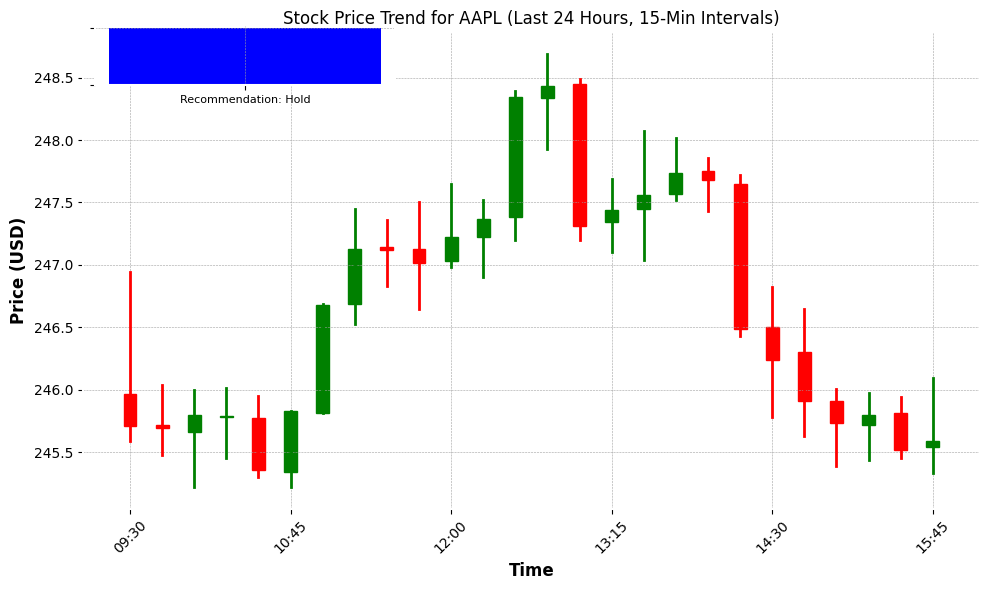

In [51]:

def plot_stock_with_recommendation(ticker="AAPL", response=None):
    # Fetch stock data for the last 24 hours
    stock = yf.Ticker(ticker)
    data = stock.history(period="1d", interval="15m")  # Last 24 hours of data with 15-minute intervals

    # Prepare the data for candlestick chart
    data['Date'] = data.index
    data['Date'] = data['Date'].map(lambda x: x.strftime('%H:%M'))
    data['up'] = data['Close'] > data['Open']
    data['color'] = np.where(data['up'], 'g', 'r')

    # Extracting recommendation from the response (assuming response is a dictionary)
    recommendation = response.get('output', 'No recommendation found') if response else 'No recommendation'

    # Create the main figure and axes for the candlestick plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Larger figure for both plots

    # Plot the candlestick chart using matplotlib
    for i in range(len(data)):
        color = 'green' if data['up'][i] else 'red'
        ax.plot([i, i], [data['Low'][i], data['High'][i]], color=color)  # Line for high/low
        ax.add_patch(plt.Rectangle((i - 0.2, data['Open'][i]), 0.4, data['Close'][i] - data['Open'][i], color=color))  # Rectangle for the body

    # Set labels and titles
    ax.set_title(f'Stock Price Trend for {ticker} (Last 24 Hours, 15-Min Intervals)')
    ax.set_ylabel('Price (USD)')
    ax.set_xlabel('Time')
    ax.set_xticks(range(0, len(data), int(len(data) / 5)))  # Ticks for x-axis
    ax.set_xticklabels(data['Date'][::int(len(data) / 5)], rotation=45)

    # Create inset axes for the recommendation bar chart (top-left corner)
    ax_inset = fig.add_axes([0.1, 0.85, 0.3, 0.1])  # Smaller axes within the main plot

    # Set bar color based on the recommendation
    bar_color = ''
    if recommendation == 'Hold':
        bar_color = 'blue'
    elif recommendation == 'Buy':
        bar_color = 'green'
    elif recommendation == 'Sell':
        bar_color = 'red'

    # Plot only the relevant bar (no empty bars)
    if bar_color:  # Only plot if we have a valid recommendation
        ax_inset.bar('Recommendation', 1, color=bar_color)
        ax_inset.set_xticks(['Recommendation'])
        ax_inset.set_xticklabels([f"Recommendation: {recommendation}"], fontsize=8)
        ax_inset.set_yticklabels([])  # Hide y-axis labels

    # Show the plot with both the candlestick chart and the recommendation bar chart
    plt.tight_layout()
    plt.show()

    # Finished chain from previous step
response = {'input': "Summarize today's latest news on the stock ticker APPL and analyze sentiment using all available information to generate the best possible investment insights. Conclude based on your information whether to hold, buy, or sell the stock", 'output': 'Hold'}

# AAPL + reposne
plot_stock_with_recommendation("AAPL", response)